## Feature Selection - Information Gain 
### 1. Mutual Information in Classification PBL
* Estimates the mutual information for a discrete target variable
* It finds the relationship between the output feature and input feature.
* If the value is zero then they are independent of each other.
* If the value is high, then they both are dependent on each other.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = df.drop(['Wine'], axis = 1)
y = df['Wine']

### We always perform on training data and apply the tranformations on test data.
#### we do train test split to avoid overfitting.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((124, 13), (54, 13))

### Before performing this we have to treat missing values otherwise it will throw error.

In [5]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
mi = mutual_info_classif(X_train, y_train)
mi

array([0.42592397, 0.29894363, 0.19215706, 0.25947481, 0.22308647,
       0.45766381, 0.72921759, 0.13210291, 0.26276434, 0.63014858,
       0.549611  , 0.55527784, 0.53680635])

In [6]:
mi = pd.Series(mi)
mi

0     0.425924
1     0.298944
2     0.192157
3     0.259475
4     0.223086
5     0.457664
6     0.729218
7     0.132103
8     0.262764
9     0.630149
10    0.549611
11    0.555278
12    0.536806
dtype: float64

If the value is high then the output is highly dependent on that feature

In [7]:
mi.index = X_train.columns
mi.index

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [8]:
mi.sort_values(ascending=False)

Flavanoids              0.729218
Color.int               0.630149
OD                      0.555278
Hue                     0.549611
Proline                 0.536806
Phenols                 0.457664
Alcohol                 0.425924
Malic.acid              0.298944
Proanth                 0.262764
Acl                     0.259475
Mg                      0.223086
Ash                     0.192157
Nonflavanoid.phenols    0.132103
dtype: float64

<Axes: >

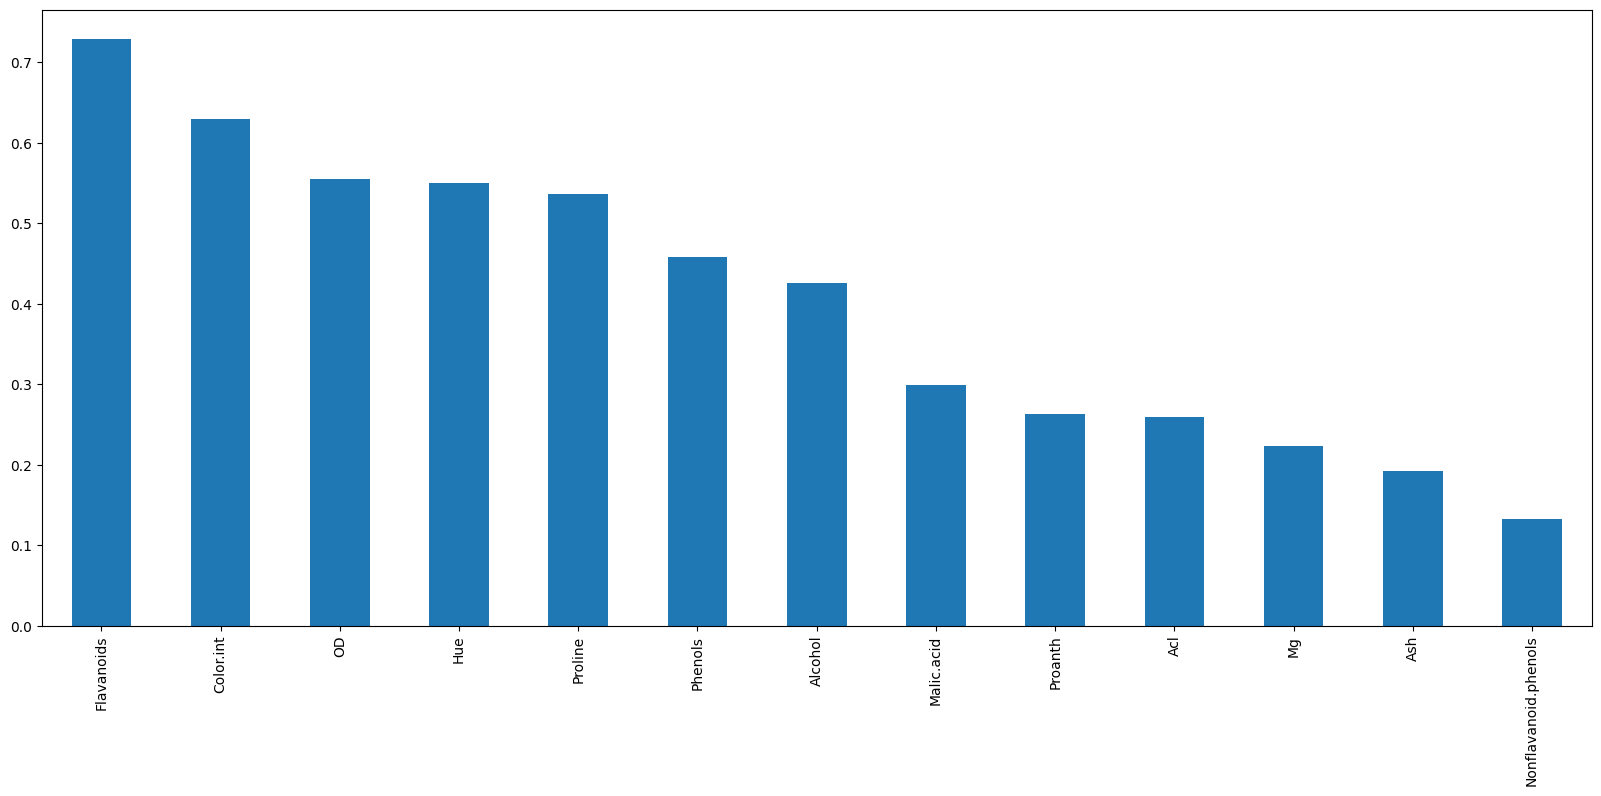

In [9]:
mi.sort_values(ascending=False).plot.bar(figsize = (20, 8))

### We will consider top 5 or 10 / 5%tile or 10%tile features as we have many features

In [10]:
sel_five = SelectKBest(mutual_info_classif, k = 5)
sel_five.fit(X_train, y_train)
X_train.columns[sel_five.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')